In [19]:
import sys
import MySQLdb as mdb
from pandas.io.sql import read_sql
import pandas as pd
import matplotlib.pyplot as plt



try:
    con = mdb.connect('localhost', 'root', '', 'sakila');

    cur = con.cursor()
    cur.execute("SELECT VERSION()")

    ver = cur.fetchone()
    
    print "Database version : %s " % ver
    
except mdb.Error, e:
  
    print "Error %d: %s" % (e.args[0],e.args[1])
    sys.exit(1)


    



Database version : 5.6.26 


In [20]:
query = 'select staff_id, year(payment_date), month(payment_date), sum(amount) from payment where year(payment_date)=2005 group by staff_id, year(payment_date), month(payment_date) ;'


df = read_sql(query, con)

con.close()

In [21]:

#df.payment_date = pd.to_datetime(df.payment_date)
#df.set_index('payment_date', inplace=True)
#df = df.reindex(df.payment_date(min(df.index)), max(df.index), fill_value=0)

df.head()



#df['year(payment_date)'][0] + df['month(payment_date)'][0]

,staff_id,year(payment_date),month(payment_date),sum(amount)
0,1,2005,5,2621.83
1,1,2005,6,4776.36
2,1,2005,7,14003.54
3,1,2005,8,11853.65
4,2,2005,5,2202.60


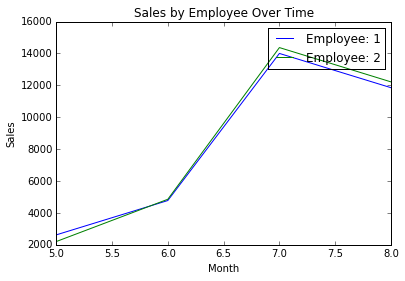

In [29]:
%matplotlib inline


fig, ax = plt.subplots()
for employee in range(1,3):
    current_data = df[df['staff_id']==employee]
    dates = current_data['month(payment_date)']
    ax.plot(dates, current_data['sum(amount)'], label='Employee: {0}'.format(employee))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Employee Over Time')
ax.legend()
plt.show()

In [19]:
df.head()

,sum(amount)
payment_date,
2005-05-24 22:53:30,2.99
2005-05-24 22:54:33,2.99
2005-05-24 23:03:39,3.99
2005-05-24 23:04:41,4.99
2005-05-24 23:05:21,6.99
